# Zadanie:

Wybraƒá trzy metody poszukiwania pierwiastk√≥w: 

* wykorzystujƒÖcƒÖ przedzia≈Ç i zmianƒô znaku, 
* wykorzystujƒÖcƒÖ pochodnƒÖ, 
* wykorzystujƒÖcƒÖ przybli≈ºenie pochodnej

## zad.1
Ka≈ºdƒÖ z trzech wybranych metod przetestowaƒá (ilo≈õƒá iteracji, ilo≈õƒá wywo≈Ça≈Ñ funkcji) na sze≈õciu wybranych  funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawiƒá w formie tabelki. <b>Pamiƒôtaƒá o sprawdzeniu czy wynik jest poprawny poprzez obliczenie warto≈õci funkcji dla znalezionego pierwiastka !</b>

In [1]:
using Roots, Plots, DataFrames, ForwardDiff

In [2]:
function intervalFalsi(f, a, b)
    tracks = Roots.Tracks(Float64, Float64)
    find_zero(f, (a, b), FalsePosition(), verbose=true)
    return tracks
end
    
function derivativeNewton(f, start)
    D(f) = x -> ForwardDiff.derivative(f, float(x))
    tracks = Roots.Tracks(Float64, Float64)
    find_zero((f, D(f)), 0.0, Roots.Newton(), verbose=true, tracks=tracks)
    return tracks
end

function derivativeApproxSecant(f, start)
    tracks = Roots.Tracks(Float64, Float64)
    find_zero(f, 0.0, Order1(), verbose=true)
    return tracks
end

derivativeApproxSecant (generic function with 1 method)

In [3]:
f1(x) = sin(x) - x / 2
f2(x) = x * exp(-x)
f3(x) = (x + 3) * (x - 1)^2
f4(x) = x^3
f5(x) = x^3 - 2 * x - 5
f6(x) = (x - 1)^7

f6 (generic function with 1 method)

In [4]:
df = DataFrame(f = String[], method = String[], iterations = Int64[], calls = Int64[], x_zero = Float64[], isZero = Bool[])

0√ó6 DataFrame

In [5]:
function test(f, a, b)
    intervalFalsi(f, a, b)
    derivativeNewton(f, (a + b) / 2)
    derivativeApproxSecant(f, (a + b) / 2)
end

test (generic function with 1 method)

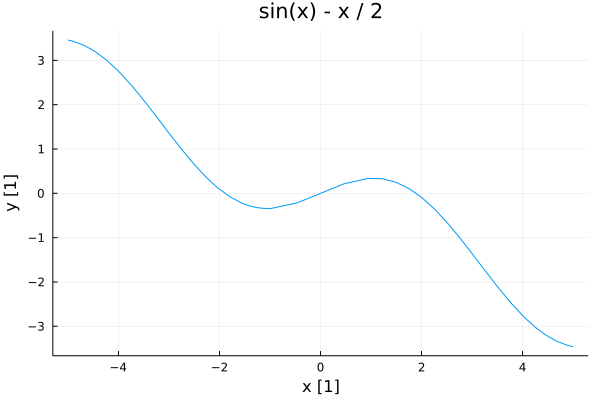

In [6]:
plot(f1, -5, 5, xlab="x [1]", ylab="y [1]", label="", title="sin(x) - x / 2")

In [7]:
test(f1, -5, 5)

Results of univariate zero finding:

* Converged to: 1.895494267033981
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 9
* function evaluations ‚âà 11
* stopped as f(x_n) = 0

Trace:
x‚ÇÅ = 0,	 fx‚ÇÅ = 0
x‚ÇÇ = 5,	 fx‚ÇÇ = -3.4589242746631386
x‚ÇÉ = 2.5,	 fx‚ÇÉ = -0.65152785589604356
x‚ÇÑ = 1.25,	 fx‚ÇÑ = 0.3239846193555862
x‚ÇÖ = 1.6651466890159652,	 fx‚ÇÖ = 0.16297896098014875
x‚ÇÜ = 1.9446763851217526,	 fx‚ÇÜ = -0.041420950418796343
x‚Çá = 1.8880306380481127,	 fx‚Çá = 0.0060864607812989302
x‚Çà = 1.8952878661159387,	 fx‚Çà = 0.00016902681276442788
x‚Çâ = 1.8954942966408586,	 fx‚Çâ = -2.4248700047913019e-08
x‚ÇÅ‚ÇÄ = 1.8954942670304449,	 fx‚ÇÅ‚ÇÄ = 2.8961277820371834e-12
x‚ÇÅ‚ÇÅ = 1.8954942670339809,	 fx‚ÇÅ‚ÇÅ = 0



Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.Newton()
* iterations: 1
* function evaluations ‚âà 2
* stopped as f(x_n) = 0

Trace:
x‚ÇÅ = 0,	 fx‚ÇÅ = 0
x‚ÇÇ = 0,	 fx‚ÇÇ = 0



Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Secant()
* iterations: 0
* function evaluations ‚âà 2
* stopped as f(x_n) = 0

Trace:
x‚ÇÅ = 6.0554544523933395e-06,	 fx‚ÇÅ = 3.027727226159662e-06
x‚ÇÇ = 0,	 fx‚ÇÇ = 0



Algorithm has not been run

In [8]:
push!(df, ["sin(x) - x/2" "interval" 9 11 1.895494267033981 iszero(f1(1.895494267033981))])
push!(df, ["sin(x) - x/2" "derivative" 1 2 0.0 iszero(f1(0.0))])
push!(df, ["sin(x) - x/2" "derivativeApprox" 0 2 0.0 iszero(f1(0.0))])

3√ó6 DataFrame
 Row ‚îÇ f             method            iterations  calls  x_zero   isZero 
     ‚îÇ String        String            Int64       Int64  Float64  Bool   
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ sin(x) - x/2  interval                   9     11  1.89549    true
   2 ‚îÇ sin(x) - x/2  derivative                 1      2  0.0        true
   3 ‚îÇ sin(x) - x/2  derivativeApprox           0      2  0.0        true

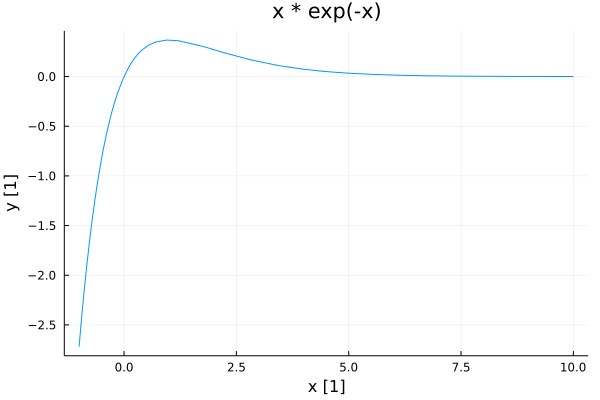

In [9]:
plot(f2, -1, 10, xlab="x [1]", ylab="y [1]", label="", title="x * exp(-x)")

In [10]:
test(f2, -1, 10)

Results of univariate zero finding:

* Converged to: 9.094947017729282e-12
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 40
* function evaluations ‚âà 42

Trace:
x‚ÇÅ = 0,	 fx‚ÇÅ = 0
x‚ÇÇ = 10,	 fx‚ÇÇ = 0.00045399929762484856
x‚ÇÉ = 5,	 fx‚ÇÉ = 0.033689734995427337
x‚ÇÑ = 2.5,	 fx‚ÇÑ = 0.20521249655974699
x‚ÇÖ = 1.25,	 fx‚ÇÖ = 0.35813099607523763
x‚ÇÜ = 0.625,	 fx‚ÇÜ = 0.33453839282436892
x‚Çá = 0.3125,	 fx‚Çá = 0.22862988404582557
x‚Çà = 0.15625,	 fx‚Çà = 0.13364770739178478
x‚Çâ = 0.078125,	 fx‚Çâ = 0.072253813532516004
x‚ÇÅ‚ÇÄ = 0.0390625,	 fx‚ÇÅ‚ÇÄ = 0.037566039125211927
x‚ÇÅ‚ÇÅ = 0.01953125,	 fx‚ÇÅ‚ÇÅ = 0.019153481428506612
x‚ÇÅ‚ÇÇ = 0.009765625,	 fx‚ÇÅ‚ÇÇ = 0.0096707217175157068
x‚ÇÅ‚ÇÉ = 0.0048828125,	 fx‚ÇÅ‚ÇÉ = 0.0048590287551272607
x‚ÇÅ‚ÇÑ = 0.00244140625,	 fx‚ÇÅ‚ÇÑ = 0.0024354530555624979
x‚ÇÅ‚ÇÖ = 0.001220703125,	 fx‚ÇÅ‚ÇÖ = 0.0012192139180053556
x‚ÇÅ‚ÇÜ = 0.0006103515625,	 fx‚ÇÅ‚ÇÜ = 0.00060997914713386539
x‚ÇÅ‚Çá = 0.00030517578125,	 fx‚ÇÅ‚Çá = 0.00030508266

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.Newton()
* iterations: 1
* function evaluations ‚âà 2
* stopped as f(x_n) = 0

Trace:
x‚ÇÅ = 0,	 fx‚ÇÅ = 0
x‚ÇÇ = 0,	 fx‚ÇÇ = 0



Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Secant()
* iterations: 0
* function evaluations ‚âà 2
* stopped as f(x_n) = 0

Trace:
x‚ÇÅ = 6.0554544523933395e-06,	 fx‚ÇÅ = 6.0554177839757365e-06
x‚ÇÇ = 0,	 fx‚ÇÇ = 0



Algorithm has not been run

In [11]:
push!(df, ["x * exp(-x)" "interval" 40 42 9.094947017729282e-12 iszero(f2(9.094947017729282e-12))])
push!(df, ["x * exp(-x)" "derivative" 1 2 0.0 iszero(f2(0.0))])
push!(df, ["x * exp(-x)" "derivativeApprox" 0 2 0.0 iszero(f2(0.0))])

6√ó6 DataFrame
 Row ‚îÇ f             method            iterations  calls  x_zero       isZero 
     ‚îÇ String        String            Int64       Int64  Float64      Bool   
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ sin(x) - x/2  interval                   9     11  1.89549        true
   2 ‚îÇ sin(x) - x/2  derivative                 1      2  0.0            true
   3 ‚îÇ sin(x) - x/2  derivativeApprox           0      2  0.0            true
   4 ‚îÇ x * exp(-x)   interval                  40     42  9.09495e-12   false
   5 ‚îÇ x * exp(-x)   derivative                 1      2  0.0            true
   6 ‚îÇ x * exp(-x)   derivativeApprox           0      2  0.0            true

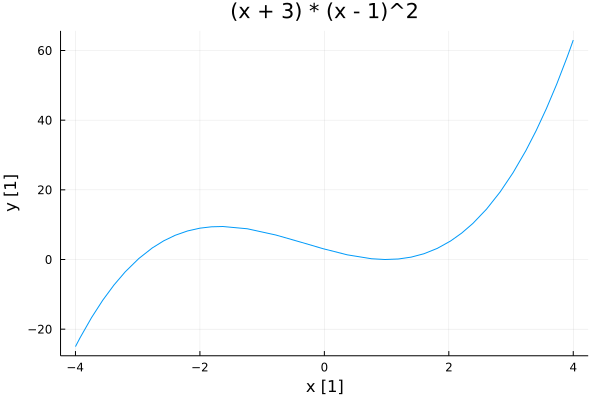

In [12]:
plot(f3, -4, 4, xlab="x [1]", ylab="y [1]", label="", title="(x + 3) * (x - 1)^2")

In [13]:
test(f3, -4, 4)

Results of univariate zero finding:

* Converged to: -3.0
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 8
* function evaluations ‚âà 10
* stopped as f(x_n) = 0

Trace:
x‚ÇÅ = -4,	 fx‚ÇÅ = -25
x‚ÇÇ = 0,	 fx‚ÇÇ = 3
x‚ÇÉ = -0.42857142857142855,	 fx‚ÇÉ = 5.2478134110787176
x‚ÇÑ = -1.4845995893223822,	 fx‚ÇÑ = 9.3549230349375367
x‚ÇÖ = -2.9925453312690409,	 fx‚ÇÖ = 0.11883053727973025
x‚ÇÜ = -3.0115798361696404,	 fx‚ÇÜ = -0.18635167233037822
x‚Çá = -2.9999569049878421,	 fx‚Çá = 0.00068950533716640111
x‚Çà = -2.9999997515587591,	 fx‚Çà = 3.9750593608262766e-06
x‚Çâ = -3.0000000000000231,	 fx‚Çâ = -3.6948222259525634e-13
x‚ÇÅ‚ÇÄ = -3,	 fx‚ÇÅ‚ÇÄ = 0



Results of univariate zero finding:

* Converged to: 0.9999999893171166
* Algorithm: Roots.Newton()
* iterations: 26
* function evaluations ‚âà 52
* stopped as |f(x_n)| ‚â§ max(Œ¥, |x|‚ãÖœµ) using Œ¥ = atol, œµ = rtol

Trace:
x‚ÇÅ = 0,	 fx‚ÇÅ = 3
x‚ÇÇ = 0.59999999999999998,	 fx‚ÇÇ = 0.57600000000000018
x‚ÇÉ = 0.81176470588235294,	 fx‚ÇÉ = 0.13506045186240584
x‚ÇÑ = 0.90826507818317204,	 fx‚ÇÑ = 0.032889207013273039
x‚ÇÖ = 0.95467723287473649,	 fx‚ÇÖ = 0.008123512971538743
x‚ÇÜ = 0.97746922076976495,	 fx‚ÇÜ = 0.0020191066159544178
x‚Çá = 0.98876660798474947,	 fx‚Çá = 0.00050333885308786899
x‚Çà = 0.99439122417482817,	 fx‚Çà = 0.00012565702210396592
x‚Çâ = 0.99719758237940248,	 fx‚Çâ = 3.1392169169394192e-05
x‚ÇÅ‚ÇÄ = 0.99859928255261032,	 fx‚ÇÅ‚ÇÄ = 7.8452892489345154e-06
x‚ÇÅ‚ÇÅ = 0.99929976396633591,	 fx‚ÇÅ‚ÇÅ = 1.9609786642799847e-06
x‚ÇÅ‚ÇÇ = 0.99964991263687364,	 fx‚ÇÅ‚ÇÇ = 4.9020174016911134e-07
x‚ÇÅ‚ÇÉ = 0.99982496397951515,	 fx‚ÇÅ‚ÇÉ = 1.225450711836327e-07
x‚ÇÅ‚ÇÑ = 0.999912483

Results of univariate zero finding:

* Converged to: 0.9999999886120837
* Algorithm: Secant()
* iterations: 37
* function evaluations ‚âà 39
* stopped as |f(x_n)| ‚â§ max(Œ¥, |x|‚ãÖœµ) using Œ¥ = atol, œµ = rtol

Trace:
x‚ÇÅ = 6.0554544523933395e-06,	 fx‚ÇÅ = 2.9999697227644067
x‚ÇÇ = 0,	 fx‚ÇÇ = 3
x‚ÇÉ = 0.60000072665724669,	 fx‚ÇÉ = 0.57599802349376761
x‚ÇÑ = 0.74257455126588756,	 fx‚ÇÑ = 0.24801241260040122
x‚ÇÖ = 0.85038439730926052,	 fx‚ÇÖ = 0.08619019465664586
x‚ÇÜ = 0.9078063739355543,	 fx‚ÇÜ = 0.033215043839825133
x‚Çá = 0.94380954601913736,	 fx‚Çá = 0.012452054582524767
x‚Çà = 0.96540149785098539,	 fx‚Çà = 0.0047468090470904525
x‚Çâ = 0.97870319885823054,	 fx‚Çâ = 0.0018045557117044276
x‚ÇÅ‚ÇÄ = 0.98686145642202372,	 fx‚ÇÅ‚ÇÄ = 0.00068821731656964601
x‚ÇÅ‚ÇÅ = 0.99189098344797522,	 fx‚ÇÅ‚ÇÅ = 0.00026249138005983306
x‚ÇÅ‚ÇÇ = 0.99499205711267502,	 fx‚ÇÅ‚ÇÇ = 0.000100192371187443
x‚ÇÅ‚ÇÉ = 0.99690644910959414,	 fx‚ÇÅ‚ÇÉ = 3.8250622987424955e-05
x‚ÇÅ‚ÇÑ = 0.99808863541611936,	 fx

Algorithm has not been run

In [14]:
push!(df, ["(x + 3) * (x - 1)^2" "interval" 8 10 -3.0 iszero(f3(-3.0))])
push!(df, ["(x + 3) * (x - 1)^2" "derivative" 26 52 0.9999999893171166 iszero(f3(0.9999999893171166))])
push!(df, ["(x + 3) * (x - 1)^2" "derivativeApprox" 37 39 0.9999999886120837 iszero(f3(0.9999999886120837))])

9√ó6 DataFrame
 Row ‚îÇ f                    method            iterations  calls  x_zero        ‚ãØ
     ‚îÇ String               String            Int64       Int64  Float64       ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ sin(x) - x/2         interval                   9     11   1.89549      ‚ãØ
   2 ‚îÇ sin(x) - x/2         derivative                 1      2   0.0
   3 ‚îÇ sin(x) - x/2         derivativeApprox           0      2   0.0
   4 ‚îÇ x * exp(-x)          interval                  40     42   9.09495e-12
   5 ‚îÇ x * exp(-x)          derivative                 1      2   0.0          ‚ãØ
   6 ‚îÇ x * exp(-x)          derivativeApprox           0      2   0.0
   7 ‚îÇ (x + 3) * (x - 1)^2  interval                   8     10  -3.0
   8 ‚îÇ (x + 3) * (x - 1)^2  derivative                26     52   1.0
   9 ‚îÇ (x + 3) * (x - 1)^2  derivativeApprox          37     39   1.0          ‚ãØ
                                                                1 column omitted

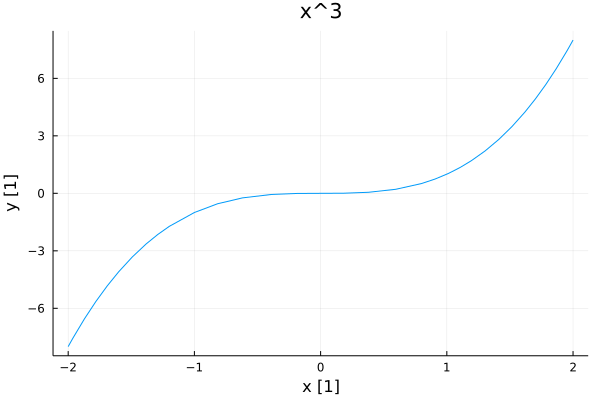

In [15]:
plot(f4, -2, 2, xlab="x [1]", ylab="y [1]", label="", title="x^3")

In [16]:
intervalFalsi(f4, -2, 2)

Results of univariate zero finding:

* Converged to: 7.62939453125e-6
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 18
* function evaluations ‚âà 20
* stopped as |f(x_n)| ‚â§ max(Œ¥, |x|‚ãÖœµ) using Œ¥ = atol, œµ = rtol

Trace:
x‚ÇÅ = 0,	 fx‚ÇÅ = 0
x‚ÇÇ = 2,	 fx‚ÇÇ = 8
x‚ÇÉ = 1,	 fx‚ÇÉ = 1
x‚ÇÑ = 0.5,	 fx‚ÇÑ = 0.125
x‚ÇÖ = 0.25,	 fx‚ÇÖ = 0.015625
x‚ÇÜ = 0.125,	 fx‚ÇÜ = 0.001953125
x‚Çá = 0.0625,	 fx‚Çá = 0.000244140625
x‚Çà = 0.03125,	 fx‚Çà = 3.0517578125e-05
x‚Çâ = 0.015625,	 fx‚Çâ = 3.814697265625e-06
x‚ÇÅ‚ÇÄ = 0.0078125,	 fx‚ÇÅ‚ÇÄ = 4.76837158203125e-07
x‚ÇÅ‚ÇÅ = 0.00390625,	 fx‚ÇÅ‚ÇÅ = 5.9604644775390625e-08
x‚ÇÅ‚ÇÇ = 0.001953125,	 fx‚ÇÅ‚ÇÇ = 7.4505805969238281e-09
x‚ÇÅ‚ÇÉ = 0.0009765625,	 fx‚ÇÅ‚ÇÉ = 9.3132257461547852e-10
x‚ÇÅ‚ÇÑ = 0.00048828125,	 fx‚ÇÅ‚ÇÑ = 1.1641532182693481e-10
x‚ÇÅ‚ÇÖ = 0.000244140625,	 fx‚ÇÅ‚ÇÖ = 1.4551915228366852e-11
x‚ÇÅ‚ÇÜ = 0.0001220703125,	 fx‚ÇÅ‚ÇÜ = 1.8189894035458565e-12
x‚ÇÅ‚Çá = 6.103515625e-05,	 fx‚ÇÅ‚Çá = 2.2737367544323206e-13
x‚Ç

Algorithm has not been run

In [17]:
derivativeNewton(f4, (-2 + 2) / 2)

Results of univariate zero finding:

* Convergence failed: 
* Algorithm Roots.Newton()

Trace:
x‚ÇÅ = 0,	 fx‚ÇÅ = 0
x‚ÇÇ = NaN,	 fx‚ÇÇ = NaN



LoadError: Roots.ConvergenceFailed("Algorithm failed to converge")

In [18]:
derivativeApproxSecant(f4, (-2 + 2) / 2)

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Secant()
* iterations: 0
* function evaluations ‚âà 2
* stopped as f(x_n) = 0

Trace:
x‚ÇÅ = 6.0554544523933395e-06,	 fx‚ÇÅ = 2.2204460492503136e-16
x‚ÇÇ = 0,	 fx‚ÇÇ = 0



Algorithm has not been run

In [19]:
push!(df, ["x^3" "interval" 18 20 7.62939453125e-6 iszero(f4(7.62939453125e-6))])
push!(df, ["x^3" "derivativeApprox" 0 2 0.0 iszero(f4(0.0))])

11√ó6 DataFrame
 Row ‚îÇ f                    method            iterations  calls  x_zero        ‚ãØ
     ‚îÇ String               String            Int64       Int64  Float64       ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ sin(x) - x/2         interval                   9     11   1.89549      ‚ãØ
   2 ‚îÇ sin(x) - x/2         derivative                 1      2   0.0
   3 ‚îÇ sin(x) - x/2         derivativeApprox           0      2   0.0
   4 ‚îÇ x * exp(-x)          interval                  40     42   9.09495e-12
   5 ‚îÇ x * exp(-x)          derivative                 1      2   0.0          ‚ãØ
   6 ‚îÇ x * exp(-x)          derivativeApprox           0      2   0.0
   7 ‚îÇ (x + 3) * (x - 1)^2  interval                   8     10  -3.0
   8 ‚îÇ (x + 3) * (x - 1)^2  derivative                26     52   1.0
   9 ‚îÇ (x + 3) * (x - 1)^2  derivativeApprox          37     39   1.0          ‚ãØ
  10 ‚îÇ x^3                  interval                  18     20   7.62939e-6
  11 ‚îÇ x^3                  derivativeApprox           0      2   0.0
                                                                1 column omitted

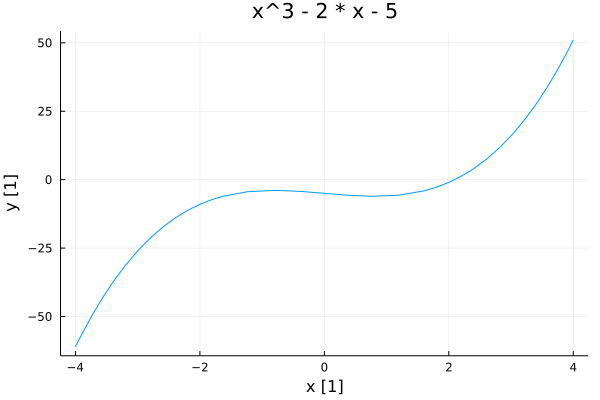

In [20]:
plot(f5, -4, 4, xlab="x [1]", ylab="y [1]", label="", title="x^3 - 2 * x - 5")

In [21]:
test(f5, -4, 4)

Results of univariate zero finding:

* Converged to: 2.0945514815423265
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 11
* function evaluations ‚âà 13
* stopped as |f(x_n)| ‚â§ max(Œ¥, |x|‚ãÖœµ) using Œ¥ = atol, œµ = rtol

Trace:
x‚ÇÅ = 0,	 fx‚ÇÅ = -5
x‚ÇÇ = 4,	 fx‚ÇÇ = 51
x‚ÇÉ = 0.35714285714285721,	 fx‚ÇÉ = -5.6687317784256557
x‚ÇÑ = 0.72154804854050514,	 fx‚ÇÑ = -6.0674353919397364
x‚ÇÖ = 1.3516846166235208,	 fx‚ÇÖ = -5.2337720934477812
x‚ÇÜ = 2.9380352792144109,	 fx‚ÇÜ = 14.485200698567038
x‚Çá = 1.7727307794161751,	 fx‚Çá = -2.97452316447017
x‚Çà = 1.9712577008899612,	 fx‚Çà = -1.2824900171327913
x‚Çâ = 2.1014663142878316,	 fx‚Çâ = 0.077480258093860499
x‚ÇÅ‚ÇÄ = 2.0940480661423497,	 fx‚ÇÅ‚ÇÄ = -0.0056172473168762949
x‚ÇÅ‚ÇÅ = 2.0945495268575081,	 fx‚ÇÅ‚ÇÅ = -2.181706886883461e-05
x‚ÇÅ‚ÇÇ = 2.0945514815438702,	 fx‚ÇÅ‚ÇÇ = 1.7227996806923329e-11
x‚ÇÅ‚ÇÉ = 2.0945514815423265,	 fx‚ÇÅ‚ÇÉ = -8.8817841970012523e-16



Results of univariate zero finding:

* Converged to: 2.0945514815423265
* Algorithm: Roots.Newton()
* iterations: 19
* function evaluations ‚âà 38
* stopped as |f(x_n)| ‚â§ max(Œ¥, |x|‚ãÖœµ) using Œ¥ = atol, œµ = rtol

Trace:
x‚ÇÅ = 0,	 fx‚ÇÅ = -5
x‚ÇÇ = -2.5,	 fx‚ÇÇ = -15.625
x‚ÇÉ = -1.5671641791044775,	 fx‚ÇÉ = -5.714632451465107
x‚ÇÑ = -0.50259244508667966,	 fx‚ÇÑ = -4.1217695422221725
x‚ÇÖ = -3.8207064676993294,	 fx‚ÇÖ = -53.132487962368174
x‚ÇÜ = -2.5493933913606064,	 fx‚ÇÜ = -16.470757614024016
x‚Çá = -1.6081114997282251,	 fx‚Çá = -5.9423896750176617
x‚Çà = -0.57610043366023933,	 fx‚Çà = -4.0390020905449111
x‚Çâ = -4.5977095833821693,	 fx‚Çâ = -92.995257569234539
x‚ÇÅ‚ÇÄ = -3.083543146726655,	 fx‚ÇÅ‚ÇÄ = -28.151976870282013
x‚ÇÅ‚ÇÅ = -2.0221942554643366,	 fx‚ÇÅ‚ÇÅ = -9.2249089970538503
x‚ÇÅ‚ÇÇ = -1.1237641075795191,	 fx‚ÇÅ‚ÇÇ = -4.1716125339957122
x‚ÇÅ‚ÇÉ = 1.2086516123957836,	 fx‚ÇÅ‚ÇÉ = -5.6516581502357903
x‚ÇÅ‚ÇÑ = 3.5807900448965704,	 fx‚ÇÅ‚ÇÑ = 33.751515208533078
x‚ÇÅ‚ÇÖ = 2

Results of univariate zero finding:

* Converged to: 2.0945514815423265
* Algorithm: Secant()
* iterations: 12
* function evaluations ‚âà 14
* stopped as |f(x_n)| ‚â§ max(Œ¥, |x|‚ãÖœµ) using Œ¥ = atol, œµ = rtol

Trace:
x‚ÇÅ = 6.0554544523933395e-06,	 fx‚ÇÅ = -5.0000121109089042
x‚ÇÇ = 0,	 fx‚ÇÇ = -5
x‚ÇÉ = -2.5000000001244578,	 fx‚ÇÉ = -15.625000002084668
x‚ÇÑ = 1.176470588063034,	 fx‚ÇÑ = -5.724608182744042
x‚ÇÖ = 3.3022807576809083,	 fx‚ÇÖ = 24.407002348308062
x‚ÇÜ = 1.5803464538888512,	 fx‚ÇÜ = -4.2137856763281247
x‚Çá = 1.8338636560934627,	 fx‚Çá = -2.5003413070038372
x‚Çà = 2.2038082799496843,	 fx‚Çà = 1.2957754399762749
x‚Çâ = 2.0775305098770178,	 fx‚Çâ = -0.18816298711778057
x‚ÇÅ‚ÇÄ = 2.0935424966209526,	 fx‚ÇÅ‚ÇÄ = -0.011255326316085501
x‚ÇÅ‚ÇÅ = 2.0945612209371021,	 fx‚ÇÅ‚ÇÅ = 0.00010870624432257614
x‚ÇÅ‚ÇÇ = 2.0945514760077542,	 fx‚ÇÅ‚ÇÇ = -6.177378608640538e-08
x‚ÇÅ‚ÇÉ = 2.0945514815422963,	 fx‚ÇÅ‚ÇÉ = -3.3839597790574771e-13
x‚ÇÅ‚ÇÑ = 2.0945514815423265,	 fx‚ÇÅ‚ÇÑ = -8.881

Algorithm has not been run

In [22]:
push!(df, ["x^3 - 2 * x - 5" "interval" 11 13 2.0945514815423265 iszero(f5(2.0945514815423265))])
push!(df, ["x^3 - 2 * x - 5" "derivative" 19 38 2.0945514815423265 iszero(f5(2.0945514815423265))])
push!(df, ["x^3 - 2 * x - 5" "derivativeApprox" 12 14 2.0945514815423265 iszero(f5(2.0945514815423265))])

14√ó6 DataFrame
 Row ‚îÇ f                    method            iterations  calls  x_zero        ‚ãØ
     ‚îÇ String               String            Int64       Int64  Float64       ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ sin(x) - x/2         interval                   9     11   1.89549      ‚ãØ
   2 ‚îÇ sin(x) - x/2         derivative                 1      2   0.0
   3 ‚îÇ sin(x) - x/2         derivativeApprox           0      2   0.0
   4 ‚îÇ x * exp(-x)          interval                  40     42   9.09495e-12
   5 ‚îÇ x * exp(-x)          derivative                 1      2   0.0          ‚ãØ
   6 ‚îÇ x * exp(-x)          derivativeApprox           0      2   0.0
   7 ‚îÇ (x + 3) * (x - 1)^2  interval                   8     10  -3.0
   8 ‚îÇ (x + 3) * (x - 1)^2  derivative                26     52   1.0
   9 ‚îÇ (x + 3) * (x - 1)^2  derivativeApprox          37     39   1.0          ‚ãØ
  10 ‚îÇ x^3                  interval                  18     20   7.62939e-6
  11 ‚îÇ x^3                  derivativeApprox           0      2   0.0
  12 ‚îÇ x^3 - 2 * x - 5      interval                  11     13   2.09455
  13 ‚îÇ x^3 - 2 * x - 5      derivative                19     38   2.09455      ‚ãØ
  14 ‚îÇ x^3 - 2 * x - 5      derivativeApprox          12     14   2.09455
                                                                1 column omitted

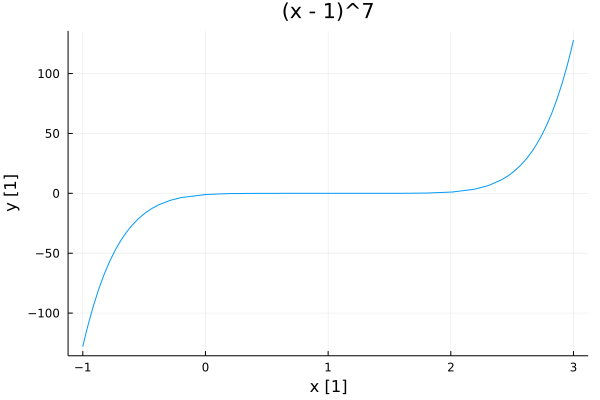

In [23]:
plot(f6, -1, 3, xlab="x [1]", ylab="y [1]", label="", title="(x - 1)^7")

In [24]:
test(f6, -1, 3)

Results of univariate zero finding:

* Converged to: 0.983422653204087
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 40
* function evaluations ‚âà 42

Trace:
x‚ÇÅ = 0,	 fx‚ÇÅ = -1
x‚ÇÇ = 3,	 fx‚ÇÇ = 128
x‚ÇÉ = 0.023255813953488413,	 fx‚ÇÉ = -0.84813667581153707
x‚ÇÑ = 0.0428500896941384,	 fx‚ÇÑ = -0.73596937147355734
x‚ÇÖ = 0.16605846167149679,	 fx‚ÇÖ = -0.28051057924708173
x‚ÇÜ = 0.2399618867241059,	 fx‚ÇÜ = -0.14650336443183945
x‚Çá = 0.31845894029425714,	 fx‚Çá = -0.068303691571876518
x‚Çà = 0.38531301008572028,	 fx‚Çà = -0.033157222870663326
x‚Çâ = 0.44689770753223368,	 fx‚Çâ = -0.015835734418894073
x‚ÇÅ‚ÇÄ = 0.50198515042378333,	 fx‚ÇÅ‚ÇÄ = -0.0075979432916675636
x‚ÇÅ‚ÇÅ = 0.55178099854459339,	 fx‚ÇÅ‚ÇÅ = -0.0036343926555306256
x‚ÇÅ‚ÇÇ = 0.59660548983223605,	 fx‚ÇÅ‚ÇÇ = -0.0017382405817845477
x‚ÇÅ‚ÇÉ = 0.63700625552872203,	 fx‚ÇÅ‚ÇÉ = -0.0008304127064310765
x‚ÇÅ‚ÇÑ = 0.67339277938926501,	 fx‚ÇÅ‚ÇÑ = -0.0003964427435927322
x‚ÇÅ‚ÇÖ = 0.70616459852488112,	 fx‚ÇÅ‚ÇÖ = -0

Results of univariate zero finding:

* Converged to: 0.9938233080518548
* Algorithm: Roots.Newton()
* iterations: 33
* function evaluations ‚âà 66
* stopped as |f(x_n)| ‚â§ max(Œ¥, |x|‚ãÖœµ) using Œ¥ = atol, œµ = rtol

Trace:
x‚ÇÅ = 0,	 fx‚ÇÅ = -1
x‚ÇÇ = 0.14285714285714285,	 fx‚ÇÇ = -0.33991667708911394
x‚ÇÉ = 0.26530612244897961,	 fx‚ÇÉ = -0.11554334736330474
x‚ÇÑ = 0.37026239067055394,	 fx‚ÇÑ = -0.03927511069548776
x‚ÇÖ = 0.46022490628904622,	 fx‚ÇÖ = -0.013350265119917321
x‚ÇÜ = 0.53733563396203965,	 fx‚ÇÜ = -0.0045379777578209921
x‚Çá = 0.60343054339603397,	 fx‚Çá = -0.0015425343201428191
x‚Çà = 0.66008332291088623,	 fx‚Çà = -0.00052433314039886255
x‚Çâ = 0.7086428482093311,	 fx‚Çâ = -0.00017822957877208092
x‚ÇÅ‚ÇÄ = 0.7502652984651409,	 fx‚ÇÅ‚ÇÄ = -6.0583206175198271e-05
x‚ÇÅ‚ÇÅ = 0.78594168439869216,	 fx‚ÇÅ‚ÇÅ = -2.0593242130478093e-05
x‚ÇÅ‚ÇÇ = 0.81652144377030755,	 fx‚ÇÅ‚ÇÇ = -6.9999864354836591e-06
x‚ÇÅ‚ÇÉ = 0.84273266608883501,	 fx‚ÇÅ‚ÇÉ = -2.3794121288184786e-06
x‚ÇÅ‚ÇÑ = 0

Results of univariate zero finding:

* Converged to: 0.9865580170713792
* Algorithm: Secant()
* iterations: 40
* function evaluations ‚âà 42

Trace:
x‚ÇÅ = 6.0554544523933395e-06,	 fx‚ÇÅ = -0.9999576125888644
x‚ÇÇ = 0,	 fx‚ÇÇ = -1
x‚ÇÉ = 0.14285973807225885,	 fx‚ÇÉ = -0.33990947287321355
x‚ÇÑ = 0.21642446331428594,	 fx‚ÇÑ = -0.1813702625538253
x‚ÇÖ = 0.30058316137369456,	 fx‚ÇÖ = -0.081875240159861973
x‚ÇÜ = 0.36983801904759422,	 fx‚ÇÜ = -0.039460754412856125
x‚Çá = 0.43426999039973957,	 fx‚Çá = -0.018546609072015573
x‚Çà = 0.49140809310164607,	 fx‚Çà = -0.0088020962960889248
x‚Çâ = 0.54302022535729633,	 fx‚Çâ = -0.0041617774635777137
x‚ÇÅ‚ÇÄ = 0.5893097620511607,	 fx‚ÇÅ‚ÇÄ = -0.0019706098941453969
x‚ÇÅ‚ÇÅ = 0.63093990493793606,	 fx‚ÇÅ‚ÇÅ = -0.00093256610145046361
x‚ÇÅ‚ÇÇ = 0.6683399263319808,	 fx‚ÇÅ‚ÇÇ = -0.00044142034927470685
x‚ÇÅ‚ÇÉ = 0.70195343196346782,	 fx‚ÇÅ‚ÇÉ = -0.00020892426235644384
x‚ÇÅ‚ÇÑ = 0.73215900214040375,	 fx‚ÇÅ‚ÇÑ = -9.8887040655527031e-05
x‚ÇÅ‚ÇÖ = 0.7593038118687

Algorithm has not been run

In [25]:
push!(df, ["(x - 1)^7" "interval" 40 42 0.983422653204087 iszero(f6(0.983422653204087))])
push!(df, ["(x - 1)^7" "derivative" 33 66 0.9938233080518548 iszero(f6(0.9938233080518548))])
push!(df, ["(x - 1)^7" "derivativeApprox" 40 42 0.9865580170713792 iszero(f6(0.9865580170713792))])

17√ó6 DataFrame
 Row ‚îÇ f                    method            iterations  calls  x_zero        ‚ãØ
     ‚îÇ String               String            Int64       Int64  Float64       ‚ãØ
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ sin(x) - x/2         interval                   9     11   1.89549      ‚ãØ
   2 ‚îÇ sin(x) - x/2         derivative                 1      2   0.0
   3 ‚îÇ sin(x) - x/2         derivativeApprox           0      2   0.0
   4 ‚îÇ x * exp(-x)          interval                  40     42   9.09495e-12
   5 ‚îÇ x * exp(-x)          derivative                 1      2   0.0          ‚ãØ
   6 ‚îÇ x * exp(-x)          derivativeApprox           0      2   0.0
   7 ‚îÇ (x + 3) * (x - 1)^2  interval                   8     10  -3.0
   8 ‚îÇ (x + 3) * (x - 1)^2  derivative                26     52   1.0
   9 ‚îÇ (x + 3) * (x - 1)^2  derivativeApprox          37     39   1.0          ‚ãØ
  10 ‚îÇ x^3                  interval                  18     20   7.62939e-6
  11 ‚îÇ x^3                  derivativeApprox           0      2   0.0
  12 ‚îÇ x^3 - 2 * x - 5      interval                  11     13   2.09455
  13 ‚îÇ x^3 - 2 * x - 5      derivative                19     38   2.09455      ‚ãØ
  14 ‚îÇ x^3 - 2 * x - 5      derivativeApprox          12     14   2.09455
  15 ‚îÇ (x - 1)^7            interval                  40     42   0.983423
  16 ‚îÇ (x - 1)^7            derivative                33     66   0.993823
  17 ‚îÇ (x - 1)^7            derivativeApprox          40     42   0.986558     ‚ãØ
                                                                1 column omitted

## zad.2
Zademonstrowaƒá wybrany, ciekawy przyk≈Çad trudnej funkcji z p.1 i dzia≈Çania metod na niej.

$f(x) = x \cdot e^{-x}$

In [26]:
f(x) = x * exp(-x)
D(f) = x -> ForwardDiff.derivative(f, float(x))
DD(f) = x -> ForwardDiff.derivative(D(f), float(x))

DD (generic function with 1 method)

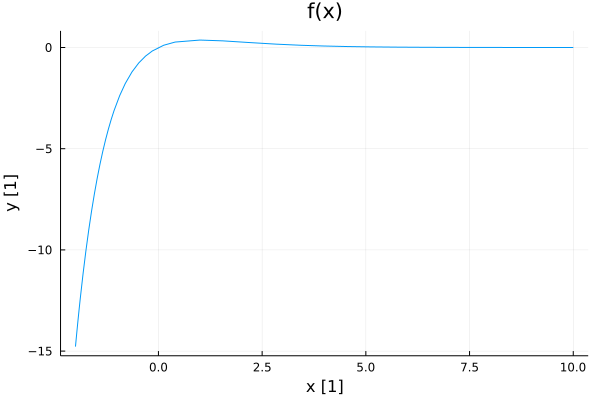

In [27]:
plot(f, -2, 10, ylab = "y [1]", xlab = "x [1]", label = "", title = "f(x)")

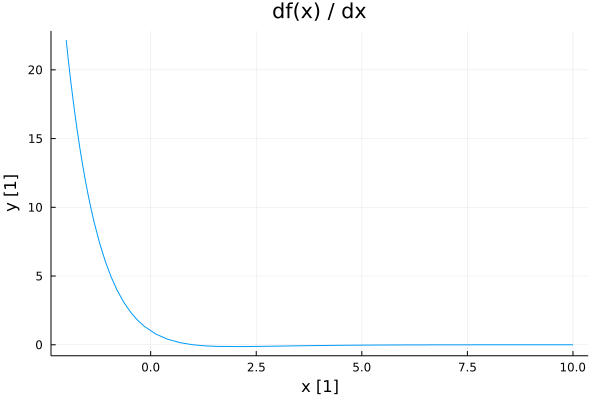

In [28]:
plot(D(f), -2, 10, ylab = "y [1]", xlab = "x [1]", label = "", title = "df(x) / dx")

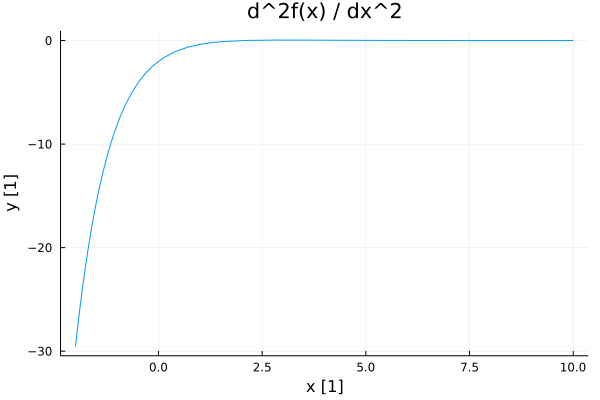

In [29]:
plot(DD(f), -2, 10, ylab = "y [1]", xlab = "x [1]", label = "", title = "d^2f(x) / dx^2")

### Metoda bisekcji

In [30]:
x = find_zero(f, (-2, 10), Bisection(), verbose=true)
iszero(f(x))

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Bisection()
* iterations: 0
* function evaluations ‚âà 3
* stopped as f(x_n) = 0

Trace:
(a‚ÇÄ, b‚ÇÄ) = ( 0, 10 )



true

### Metoda regu≈Ça falsi

In [31]:
find_zero(f, (-2, 10), FalsePosition(), verbose=true)
iszero(f(x))

Results of univariate zero finding:

* Converged to: 9.094947017729282e-12
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 40
* function evaluations ‚âà 42

Trace:
x‚ÇÅ = 0,	 fx‚ÇÅ = 0
x‚ÇÇ = 10,	 fx‚ÇÇ = 0.00045399929762484856
x‚ÇÉ = 5,	 fx‚ÇÉ = 0.033689734995427337
x‚ÇÑ = 2.5,	 fx‚ÇÑ = 0.20521249655974699
x‚ÇÖ = 1.25,	 fx‚ÇÖ = 0.35813099607523763
x‚ÇÜ = 0.625,	 fx‚ÇÜ = 0.33453839282436892
x‚Çá = 0.3125,	 fx‚Çá = 0.22862988404582557
x‚Çà = 0.15625,	 fx‚Çà = 0.13364770739178478
x‚Çâ = 0.078125,	 fx‚Çâ = 0.072253813532516004
x‚ÇÅ‚ÇÄ = 0.0390625,	 fx‚ÇÅ‚ÇÄ = 0.037566039125211927
x‚ÇÅ‚ÇÅ = 0.01953125,	 fx‚ÇÅ‚ÇÅ = 0.019153481428506612
x‚ÇÅ‚ÇÇ = 0.009765625,	 fx‚ÇÅ‚ÇÇ = 0.0096707217175157068
x‚ÇÅ‚ÇÉ = 0.0048828125,	 fx‚ÇÅ‚ÇÉ = 0.0048590287551272607
x‚ÇÅ‚ÇÑ = 0.00244140625,	 fx‚ÇÅ‚ÇÑ = 0.0024354530555624979
x‚ÇÅ‚ÇÖ = 0.001220703125,	 fx‚ÇÅ‚ÇÖ = 0.0012192139180053556
x‚ÇÅ‚ÇÜ = 0.0006103515625,	 fx‚ÇÅ‚ÇÜ = 0.00060997914713386539
x‚ÇÅ‚Çá = 0.00030517578125,	 fx‚ÇÅ‚Çá = 0.00030508266

true

### Metoda Newtona

In [32]:
x = find_zero((f, D(f)), -2, Roots.Newton(), verbose=true)
iszero(f(x))

Results of univariate zero finding:

* Converged to: -2.032052099592921e-18
* Algorithm: Roots.Newton()
* iterations: 8
* function evaluations ‚âà 16
* stopped as |f(x_n)| ‚â§ max(Œ¥, |x|‚ãÖœµ) using Œ¥ = atol, œµ = rtol

Trace:
x‚ÇÅ = -2,	 fx‚ÇÅ = -14.778112197861301
x‚ÇÇ = -1.3333333333333333,	 fx‚ÇÇ = -5.0582238595775699
x‚ÇÉ = -0.76190476190476186,	 fx‚ÇÉ = -1.6322689592431341
x‚ÇÑ = -0.32947232947232946,	 fx‚ÇÑ = -0.45804374954051696
x‚ÇÖ = -0.081650451447160044,	 fx‚ÇÖ = -0.088596982538287114
x‚ÇÜ = -0.0061635403679676792,	 fx‚ÇÜ = -0.0062016469128125156
x‚Çá = -3.7756516056698143e-05,	 fx‚Çá = -3.775794163811521e-05
x‚Çà = -1.425500682806244e-09,	 fx‚Çà = -1.4255006848382961e-09
x‚Çâ = -2.0320520995929209e-18,	 fx‚Çâ = -2.0320520995929209e-18



false

### Metoda Halleya

In [33]:
x = find_zero((f, D(f), DD(f)), -2, Roots.Halley(), verbose=true) 
iszero(f(x))

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Roots.Halley()
* iterations: 5
* function evaluations ‚âà 18
* stopped as f(x_n) = 0

Trace:
x‚ÇÅ = -2,	 fx‚ÇÅ = -14.778112197861301
x‚ÇÇ = -0.7999999999999996,	 fx‚ÇÇ = -1.7804327427939723
x‚ÇÉ = -0.12075471698113194,	 fx‚ÇÉ = -0.13625335713691178
x‚ÇÑ = -0.00078046902930356543,	 fx‚ÇÑ = -0.00078107839897541341
x‚ÇÖ = -2.3751884530368028e-10,	 fx‚ÇÖ = -2.375188453600955e-10
x‚ÇÜ = 0,	 fx‚ÇÜ = 0



true

### Metoda z kalkulator√≥w HP-34

In [34]:
x = find_zero(f, -2, verbose=true)
iszero(f(x))

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Secant(); finished with bracketing method AlefeldPotraShi()
* iterations: 14
* function evaluations ‚âà 17
* stopped as f(x_n) = 0
* Note: Used bracketing method AlefeldPotraShi() on  [-4.8744159937079164e-11,3.744464448531951e-10]

Trace:
x‚ÇÅ = -1.9999939444722106,	 fx‚ÇÅ = -14.77797796449957
x‚ÇÇ = -2,	 fx‚ÇÇ = -14.778112197861301
x‚ÇÉ = -1.9993944472210572,	 fx‚ÇÉ = -14.764694225178392
x‚ÇÑ = -1.9388391693267764,	 fx‚ÇÑ = -13.476246228157748
x‚ÇÖ = -1.305474192855187,	 fx‚ÇÖ = -4.8164663356020325
x‚ÇÜ = -0.953204143826899,	 fx‚ÇÜ = -2.4726191101781154
x‚Çá = -0.58158024030512023,	 fx‚Çá = -1.0403673919370258
x‚Çà = -0.31163789262672875,	 fx‚Çà = -0.42559143183683862
x‚Çâ = -0.12476469374119972,	 fx‚Çâ = -0.14134365674978397
x‚ÇÅ‚ÇÄ = -0.031841041934528969,	 fx‚ÇÅ‚ÇÄ = -0.032871207625670272
x‚ÇÅ‚ÇÅ = -0.0036817012306272351,	 fx‚ÇÅ‚ÇÅ = -0.0036952811378198015
x‚ÇÅ‚ÇÇ = -0.00011517591051782685,	 fx‚ÇÅ‚ÇÇ = -0.000115

true

### Metoda siecznych

In [35]:
x = find_zero(f, -2, Order1(),  verbose=true) 
iszero(f(x))

Results of univariate zero finding:

* Converged to: -8.697677347131879e-17
* Algorithm: Secant()
* iterations: 11
* function evaluations ‚âà 13
* stopped as |f(x_n)| ‚â§ max(Œ¥, |x|‚ãÖœµ) using Œ¥ = atol, œµ = rtol

Trace:
x‚ÇÅ = -1.9999939444722106,	 fx‚ÇÅ = -14.77797796449957
x‚ÇÇ = -2,	 fx‚ÇÇ = -14.778112197861301
x‚ÇÉ = -1.3333306419842814,	 fx‚ÇÉ = -5.058200036092888
x‚ÇÑ = -0.98639880611431496,	 fx‚ÇÑ = -2.6450878242524376
x‚ÇÖ = -0.60611596207479068,	 fx‚ÇÖ = -1.1111905492360754
x‚ÇÜ = -0.33063030262681475,	 fx‚ÇÜ = -0.46018617842281528
x‚Çá = -0.13589321864490342,	 fx‚Çá = -0.15567377611947864
x‚Çà = -0.036339121719282094,	 fx‚Çà = -0.037683940262601918
x‚Çâ = -0.0045432418945730788,	 fx‚Çâ = -0.0045639299012097522
x‚ÇÅ‚ÇÄ = -0.00016177688040689212,	 fx‚ÇÅ‚ÇÄ = -0.00016180305428303322
x‚ÇÅ‚ÇÅ = -7.3326531404790691e-07,	 fx‚ÇÅ‚ÇÅ = -7.3326585172612486e-07
x‚ÇÅ‚ÇÇ = -1.1861573663054946e-10,	 fx‚ÇÅ‚ÇÇ = -1.1861573664461916e-10
x‚ÇÅ‚ÇÉ = -8.6976773471318787e-17,	 fx‚ÇÅ‚ÇÉ = -8.697

false

### Metoda Steffensena

In [36]:
x = find_zero(f, -2, Order2(), verbose=true) 
iszero(f(x))

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Order2()
* iterations: 10
* function evaluations ‚âà 14
* stopped as f(x_n) = 0

Trace:
x‚ÇÅ = -1.9999939444722106,	 fx‚ÇÅ = -14.77797796449957
x‚ÇÇ = -2,	 fx‚ÇÇ = -14.778112197861301
x‚ÇÉ = -1.3333306419842814,	 fx‚ÇÉ = -5.058200036092888
x‚ÇÑ = -0.98639880611431496,	 fx‚ÇÑ = -2.6450878242524376
x‚ÇÖ = -0.60611596207479068,	 fx‚ÇÖ = -1.1111905492360754
x‚ÇÜ = -0.33063030262681475,	 fx‚ÇÜ = -0.46018617842281528
x‚Çá = -0.13589321864490342,	 fx‚Çá = -0.15567377611947864
x‚Çà = -0.036339121719282094,	 fx‚Çà = -0.037683940262601918
x‚Çâ = -0.0045432418945730788,	 fx‚Çâ = -0.0045639299012097522
x‚ÇÅ‚ÇÄ = -0.00016177688040689212,	 fx‚ÇÅ‚ÇÄ = -0.00016180305428303322
x‚ÇÅ‚ÇÅ = 4.2339855850937608e-12,	 fx‚ÇÅ‚ÇÅ = 4.2339855850758342e-12
x‚ÇÅ‚ÇÇ = 0,	 fx‚ÇÅ‚ÇÇ = 0



true

W przypadku badanej funkcji metody Newtona i siecznych nie da≈Çy rady znale≈∫ƒá wystarczajƒÖco dok≈Çadnie pierwiastk√≥w

## zad.3
Dla ka≈ºdej z wybranych metod zademonstrowaƒá i wyja≈õniƒá po jednym  przyk≈Çadzie, dla kt√≥rego nie dzia≈ÇajƒÖ (mo≈ºna na podstawie p.1 lub wymy≈õliƒá w≈Çasny)

### Metoda regu≈Ç falsi

$ f(x) = sin(x) $

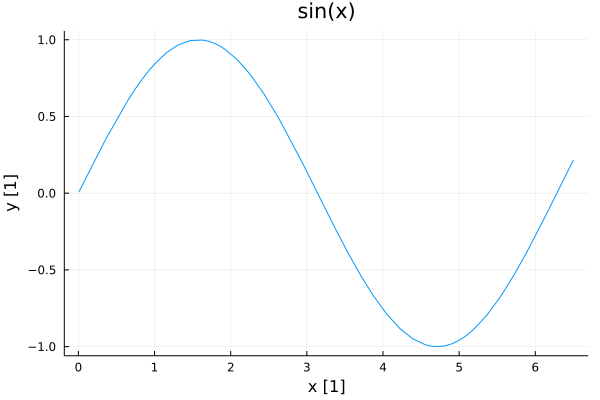

In [37]:
f(x) = sin(x)
a, b = 0.01, 6.5
plot(f, a, b, ylab = "y [1]", xlab = "x [1]", label = "", title = "sin(x)")

In [38]:
intervalFalsi(f, a, b)

LoadError: ArgumentError: The interval [a,b] is not a bracketing interval.
You need f(a) and f(b) to have different signs (f(a) * f(b) < 0).
Consider a different bracket or try fzero(f, c) with an initial guess c.



Metoda nie dzia≈Ça, poniewa≈º warto≈õci na kra≈Ñcach oraz w jego ≈õrodku sƒÖ tego samego znaku (algorytm opiera siƒô na fakcie, ≈ºe dla funkcji ciƒÖg≈Çej w przedziale [a,b] o r√≥≈ºnych znakach na jego ko≈Ñcu funkcja w tym przedziale ma pierwiastek).

### Metoda Newtona

$ f(x) = sgn(x) \cdot \sqrt{|x|} $

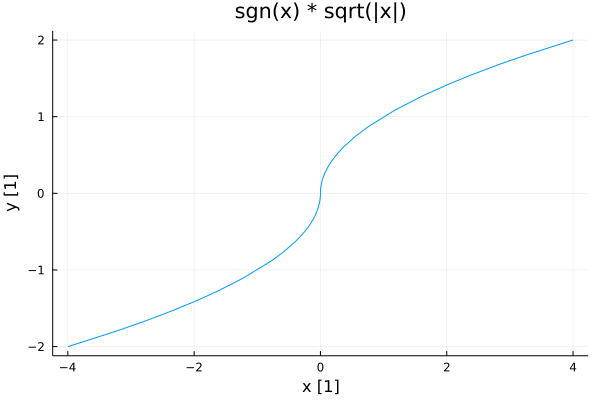

In [39]:
f(x) = sign(x) * sqrt(abs(x))
a, b = -4, 4
plot(f, a, b, ylab = "y [1]", xlab = "x [1]", label = "", title = "sgn(x) * sqrt(|x|)")

In [40]:
D(f) = x -> ForwardDiff.derivative(f, float(x))
find_zero((f, D(f)), -1, Roots.Newton(), verbose=true)

Results of univariate zero finding:

* Convergence failed: 
* Algorithm Roots.Newton()

Trace:
x‚ÇÅ = -1,	 fx‚ÇÅ = -1
x‚ÇÇ = 1,	 fx‚ÇÇ = 1
x‚ÇÉ = -1,	 fx‚ÇÉ = -1
x‚ÇÑ = 1,	 fx‚ÇÑ = 1
x‚ÇÖ = -1,	 fx‚ÇÖ = -1
x‚ÇÜ = 1,	 fx‚ÇÜ = 1
x‚Çá = -1,	 fx‚Çá = -1
x‚Çà = 1,	 fx‚Çà = 1
x‚Çâ = -1,	 fx‚Çâ = -1
x‚ÇÅ‚ÇÄ = 1,	 fx‚ÇÅ‚ÇÄ = 1
x‚ÇÅ‚ÇÅ = -1,	 fx‚ÇÅ‚ÇÅ = -1
x‚ÇÅ‚ÇÇ = 1,	 fx‚ÇÅ‚ÇÇ = 1
x‚ÇÅ‚ÇÉ = -1,	 fx‚ÇÅ‚ÇÉ = -1
x‚ÇÅ‚ÇÑ = 1,	 fx‚ÇÅ‚ÇÑ = 1
x‚ÇÅ‚ÇÖ = -1,	 fx‚ÇÅ‚ÇÖ = -1
x‚ÇÅ‚ÇÜ = 1,	 fx‚ÇÅ‚ÇÜ = 1
x‚ÇÅ‚Çá = -1,	 fx‚ÇÅ‚Çá = -1
x‚ÇÅ‚Çà = 1,	 fx‚ÇÅ‚Çà = 1
x‚ÇÅ‚Çâ = -1,	 fx‚ÇÅ‚Çâ = -1
x‚ÇÇ‚ÇÄ = 1,	 fx‚ÇÇ‚ÇÄ = 1
x‚ÇÇ‚ÇÅ = -1,	 fx‚ÇÇ‚ÇÅ = -1
x‚ÇÇ‚ÇÇ = 1,	 fx‚ÇÇ‚ÇÇ = 1
x‚ÇÇ‚ÇÉ = -1,	 fx‚ÇÇ‚ÇÉ = -1
x‚ÇÇ‚ÇÑ = 1,	 fx‚ÇÇ‚ÇÑ = 1
x‚ÇÇ‚ÇÖ = -1,	 fx‚ÇÇ‚ÇÖ = -1
x‚ÇÇ‚ÇÜ = 1,	 fx‚ÇÇ‚ÇÜ = 1
x‚ÇÇ‚Çá = -1,	 fx‚ÇÇ‚Çá = -1
x‚ÇÇ‚Çà = 1,	 fx‚ÇÇ‚Çà = 1
x‚ÇÇ‚Çâ = -1,	 fx‚ÇÇ‚Çâ = -1
x‚ÇÉ‚ÇÄ = 1,	 fx‚ÇÉ‚ÇÄ = 1
x‚ÇÉ‚ÇÅ = -1,	 fx‚ÇÉ‚ÇÅ = -1
x‚ÇÉ‚ÇÇ = 1,	 fx‚ÇÉ‚ÇÇ = 1
x‚ÇÉ‚ÇÉ = -1,	 fx‚ÇÉ‚ÇÉ = -1
x‚ÇÉ‚ÇÑ = 1,	 fx‚ÇÉ‚ÇÑ = 1
x‚ÇÉ‚ÇÖ

LoadError: Roots.ConvergenceFailed("Algorithm failed to converge")

W trakcie dzia≈Çania algorytm "przeskakuje" ca≈Çy czas z "lewej na prawƒÖ" zmieniajƒÖc tylko znak

### Metoda siecznych

$ \frac{x^{2} + 2x + 2}{x^{2} - 2x + 2} $

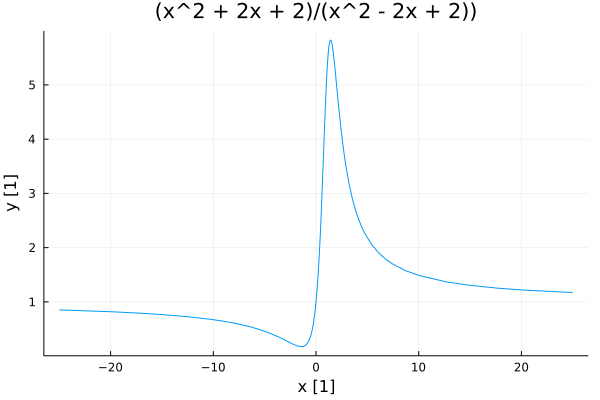

In [41]:
f(x) = (x^2 + 2x + 2)/(x^2 - 2x + 2)
a, b = -25, 25
plot(f, a, b, ylab = "y [1]", xlab = "x [1]", label = "", title = "(x^2 + 2x + 2)/(x^2 - 2x + 2))")

In [42]:
find_zero(f, -2, verbose=true)

Results of univariate zero finding:

* Convergence failed: 
* Algorithm Secant()

Trace:
x‚ÇÅ = -1.9999939444722106,	 fx‚ÇÅ = 0.19999951555895026
x‚ÇÇ = -2,	 fx‚ÇÇ = 0.20000000000000001
x‚ÇÉ = -1.9993944472210572,	 fx‚ÇÉ = 0.19995156751793952
x‚ÇÑ = -1.9388391693267764,	 fx‚ÇÑ = 0.19523324518726415
x‚ÇÖ = -1.8830022297196667,	 fx‚ÇÖ = 0.19112434709606699
x‚ÇÜ = -1.8412928307256533,	 fx‚ÇÜ = 0.18822704606435364
x‚Çá = -1.8034900476901377,	 fx‚Çá = 0.18574251052962051
x‚Çà = -1.770120539853941,	 fx‚Çà = 0.18367131976851178
x‚Çâ = -1.7376604672358098,	 fx‚Çâ = 0.18177540633714287



LoadError: Roots.ConvergenceFailed("Algorithm failed to converge")